In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
%cd ../../../

c:\Users\aweaver\OneDrive - The Cincinnati Insurance Company\Small Business\Hit Ratio Model


In [3]:
from PredicTables.PCA import PCA
from PredicTables.PCA.src import create_loading_plot

In [4]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=42)

X.shape, X_train.shape, X_val.shape, X_test.shape

((569, 30), (341, 30), (114, 30), (114, 30))

In [6]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487


In [7]:
pca = PCA(df=X_train, n_components=17)
pca

PCA[17 components]

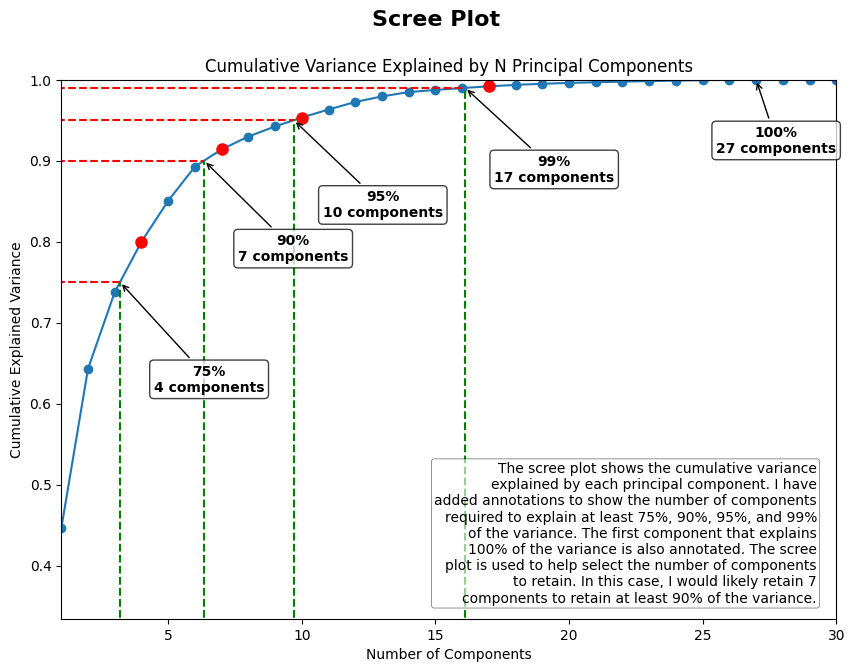

In [8]:
pca.scree()

In [9]:
from PredicTables.lookups import generate_date_lookup

generate_date_lookup()

c:\Users\aweaver\OneDrive - The Cincinnati Insurance Company\Small Business\Hit Ratio Model\PredicTables\lookups\src\generate_date_lookup.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: (2 * np.pi) * ((x[0] - 1) / x[1]), axis=1
c:\Users\aweaver\OneDrive - The Cincinnati Insurance Company\Small Business\Hit Ratio Model\PredicTables\lookups\src\generate_date_lookup.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: (2 * np.pi) * ((x[0] - 1) / x[1]), axis=1


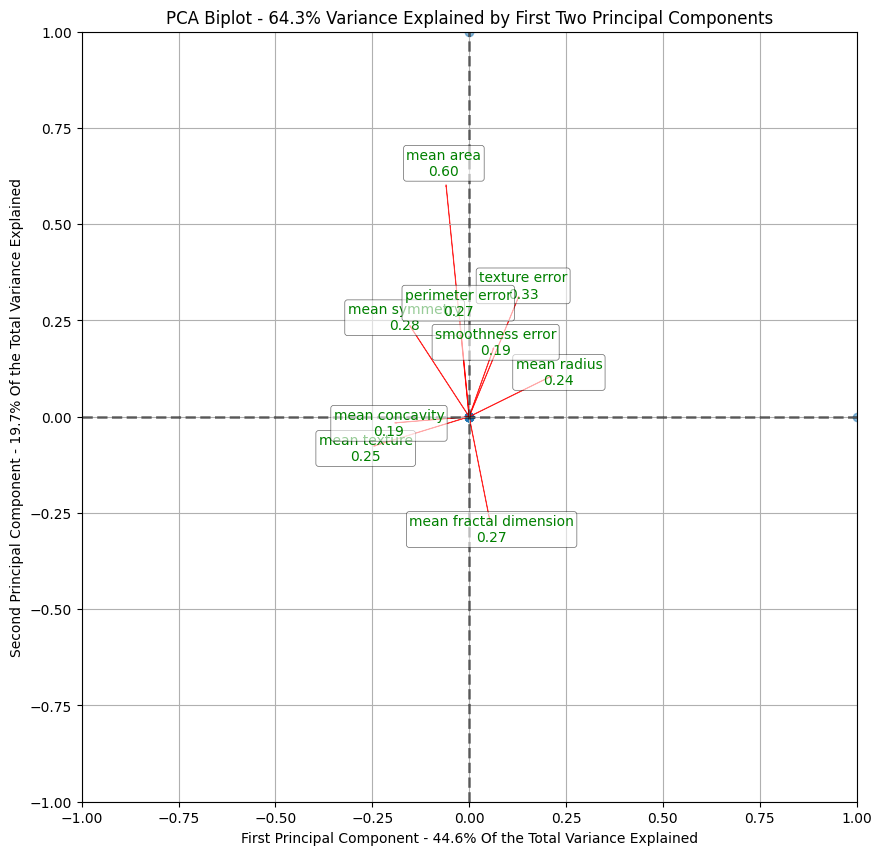

In [10]:
pca.biplot(loading_threshold=0.15)

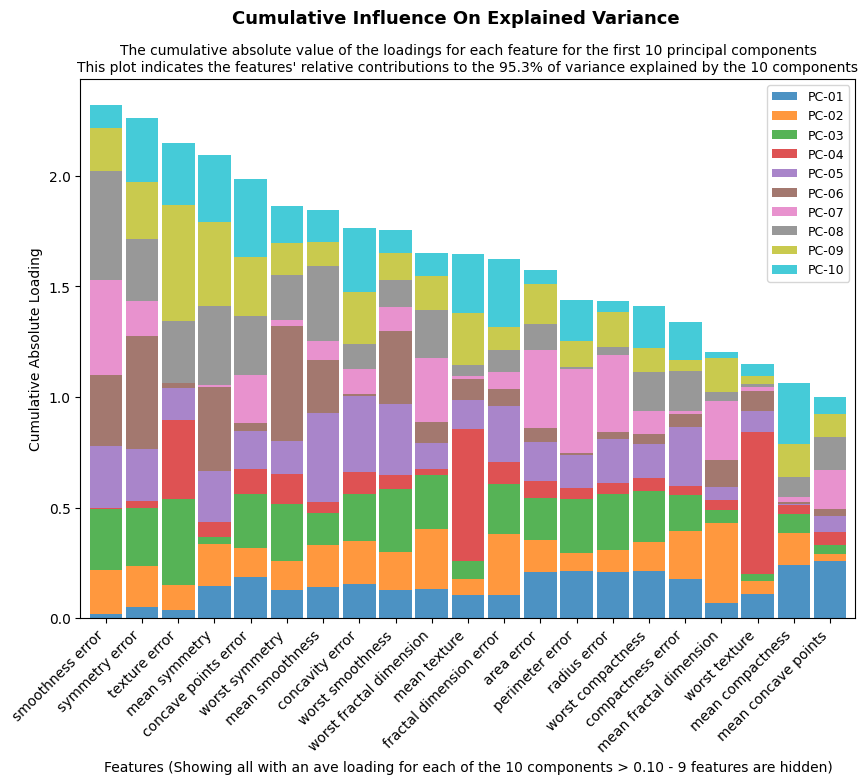

In [11]:
pca.loading_plot(n_components=10)

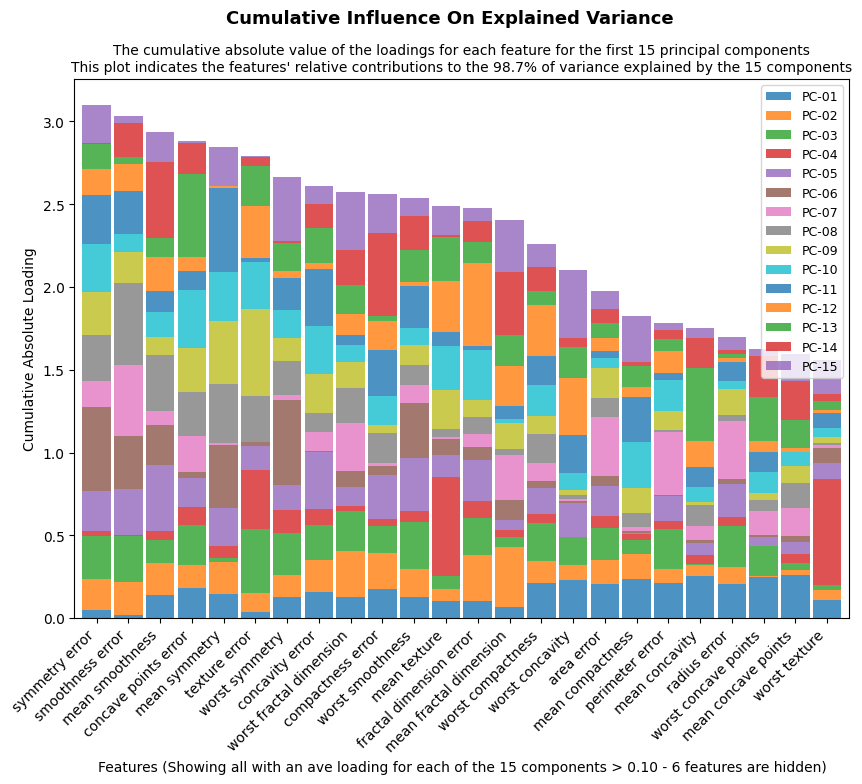

In [12]:
%run ./PredicTables/PCA/src/create_loading_plot.py
create_loading_plot(pca.pca, X_train.columns, n_components=15, figsize=(10, 7))

In [13]:
pca.feature_importance()

,Feature Importance
mean symmetry,0.056100
smoothness error,0.055362
symmetry error,0.053981
texture error,0.053346
concave points error,0.048109
worst symmetry,0.047942
fractal dimension error,0.047869
mean smoothness,0.046656
mean fractal dimension,0.045313
mean texture,0.043804
